In [ ]:
from Bitcoin_MonteCarlo import Timeseries_MonteCarlo
trading_days = 365
horizon = 365
model = 'Returns'
simulations = 100000
risk_free_rate = .03
ticker = 'BTC-USD'
period = 'max' # Can also have a start/end data,  dict(start='2000-01-01',end='2015-01-01')

# If choosing to evaluate options
options_info = dict(type='Asian', strike='geometric', call=True, interval=4) # Only necessary if model='Options', can be European or Asian.

# This shows some potential in building a relevant series
arch_garch = dict(vol='GARCH', p=1, q=1, o=0, mean="Zero", rescale=True, dist='normal') # These are default values, can be changed
arima = dict(information_criterion='bic') # These are default values, can be changed

TS = Timeseries_MonteCarlo(ticker=ticker, period=period, model=model, horizon=horizon, trading_days=trading_days, options_info=options_info, risk_free_rate=risk_free_rate, arima=arima,arch_garch=arch_garch)
TS.run_simulation(simulations)
TS.simulation_statistics()

C:\Users\G_MAN\anaconda3\envs\data_science\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\G_MAN\anaconda3\envs\data_science\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


Beginning Simulations...
Completed Simulation # 1
Completed Simulation # 101
Completed Simulation # 201
Completed Simulation # 301
Completed Simulation # 401


Beginning Simulations...
Completed Simulation # 1
Completed Simulation # 2
Completed Simulation # 3
Completed Simulation # 4
Completed Simulation # 5
Completed Simulation # 6
Completed Simulation # 7
Completed Simulation # 8
Completed Simulation # 9
Completed Simulation # 10
Completed Simulation # 11
Completed Simulation # 12
Completed Simulation # 13
Completed Simulation # 14
Completed Simulation # 15
Completed Simulation # 16
Completed Simulation # 17
Completed Simulation # 18
Completed Simulation # 19
Completed Simulation # 20
Completed Simulation # 21
Completed Simulation # 22
Completed Simulation # 23
Completed Simulation # 24
Completed Simulation # 25

25 Simulation(s) Completed in 0 hour(s), 0 minute(s), and 14.23 second(s)
--------------------------------------------------------------------------
Simulated prices from 7 year(s), 5 month(s), and 22 day(s) of historical data
Average Profit/Loss: $1,431.76
Profit/Loss Ranges from $-7,791.41 - $7,307.28
Probability of Earning a Ret

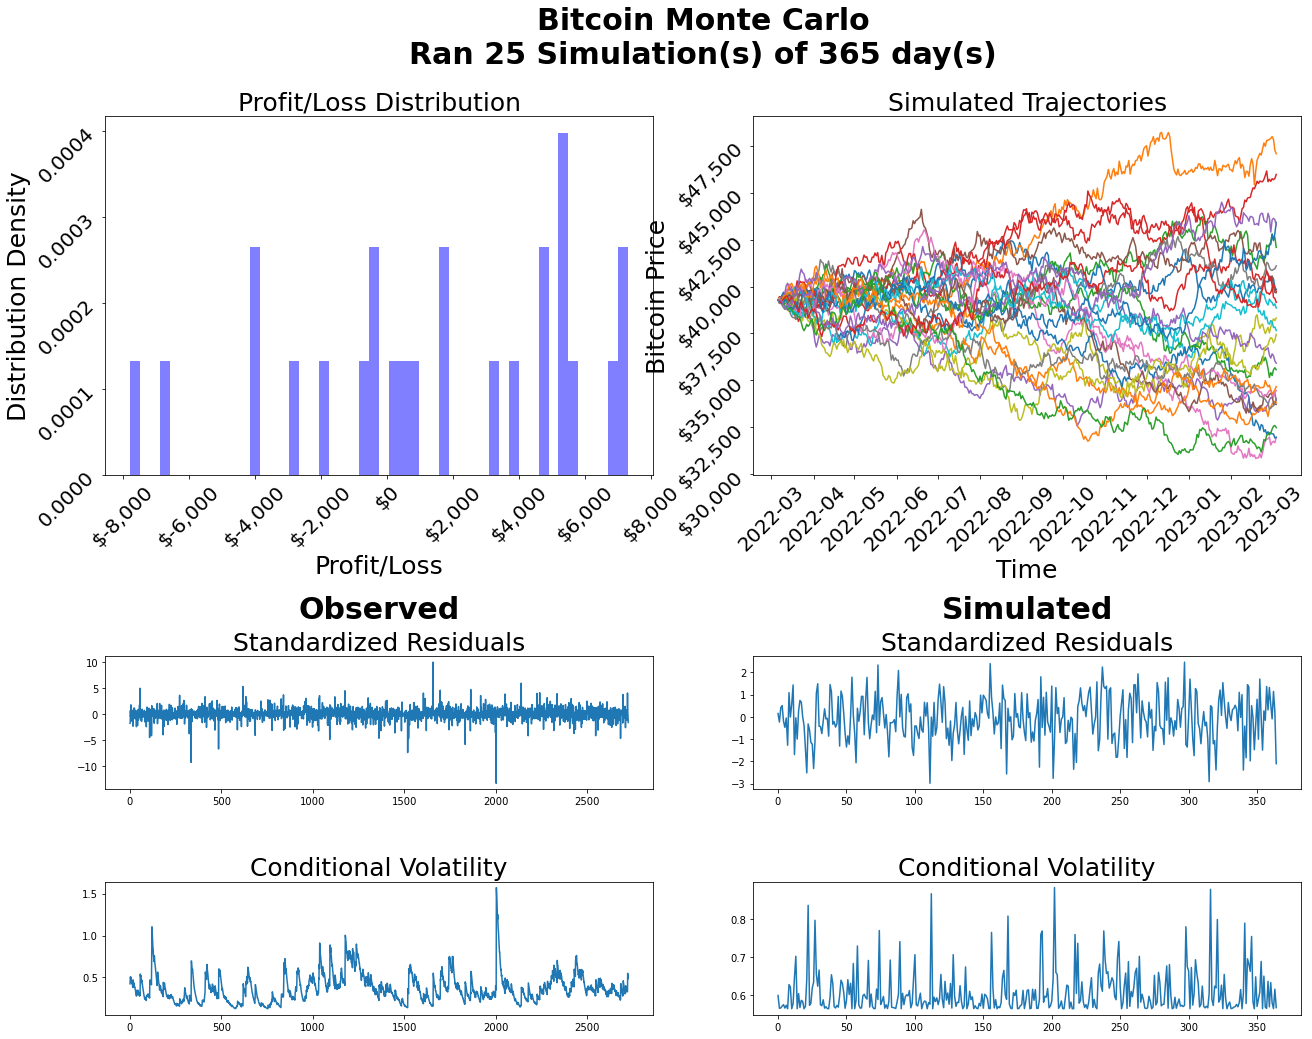

In [2]:
# This shows some promise
arch_garch = dict(vol='GARCH', p=1, q=1,o=0, mean="Zero", rescale=True, dist='t') # These are default values, can be changed
TS = Timeseries_MonteCarlo(ticker=ticker, period=period, model=model, horizon=horizon, trading_days=trading_days, options_info=options_info, risk_free_rate=risk_free_rate, arima=arima,arch_garch=arch_garch)
TS.run_simulation(simulations)
TS.simulation_statistics()

Beginning Simulations...
Completed Simulation # 1
Completed Simulation # 2
Completed Simulation # 3
Completed Simulation # 4
Completed Simulation # 5
Completed Simulation # 6
Completed Simulation # 7
Completed Simulation # 8
Completed Simulation # 9
Completed Simulation # 10
Completed Simulation # 11
Completed Simulation # 12
Completed Simulation # 13
Completed Simulation # 14
Completed Simulation # 15
Completed Simulation # 16
Completed Simulation # 17
Completed Simulation # 18
Completed Simulation # 19
Completed Simulation # 20
Completed Simulation # 21
Completed Simulation # 22
Completed Simulation # 23
Completed Simulation # 24
Completed Simulation # 25

25 Simulation(s) Completed in 0 hour(s), 0 minute(s), and 14.65 second(s)
--------------------------------------------------------------------------
Simulated prices from 7 year(s), 5 month(s), and 22 day(s) of historical data
Average Profit/Loss: $-144.78
Profit/Loss Ranges from $-9,476.67 - $11,069.82
Probability of Earning a Ret

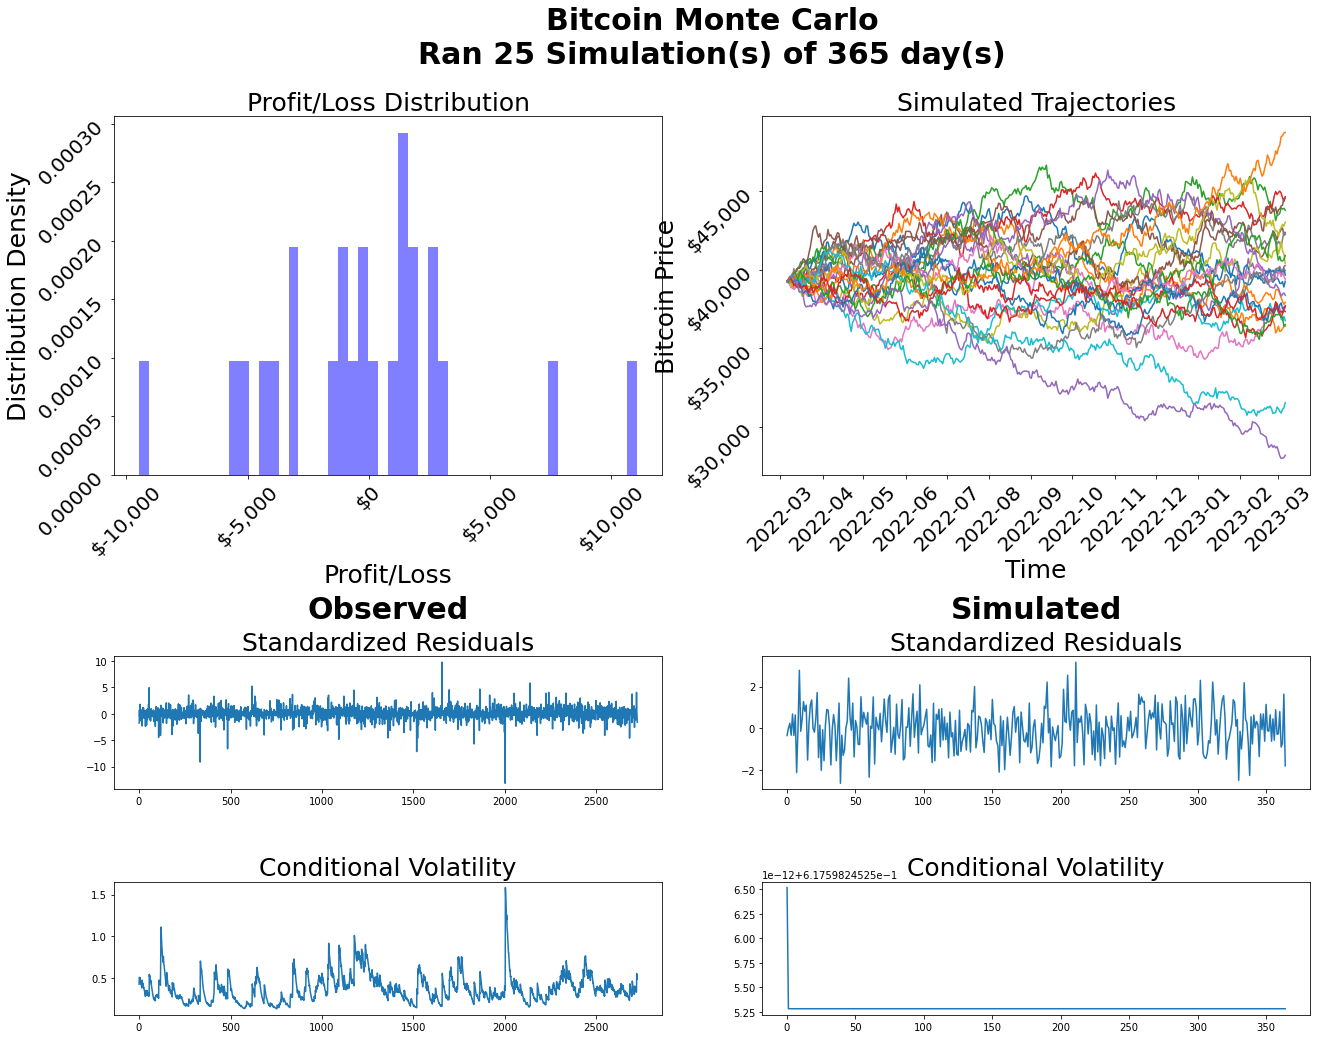

In [3]:
arch_garch = dict(vol='GARCH', p=1, q=1,o=0, mean="Zero", rescale=True, dist='skewt') # These are default values, can be changed
TS = Timeseries_MonteCarlo(ticker=ticker, period=period, model=model, horizon=horizon, trading_days=trading_days, options_info=options_info, risk_free_rate=risk_free_rate, arima=arima,arch_garch=arch_garch)
TS.run_simulation(simulations)
TS.simulation_statistics()

Beginning Simulations...
Completed Simulation # 1
Completed Simulation # 2
Completed Simulation # 3
Completed Simulation # 4
Completed Simulation # 5
Completed Simulation # 6
Completed Simulation # 7
Completed Simulation # 8
Completed Simulation # 9
Completed Simulation # 10
Completed Simulation # 11
Completed Simulation # 12
Completed Simulation # 13
Completed Simulation # 14
Completed Simulation # 15
Completed Simulation # 16
Completed Simulation # 17
Completed Simulation # 18
Completed Simulation # 19
Completed Simulation # 20
Completed Simulation # 21
Completed Simulation # 22
Completed Simulation # 23
Completed Simulation # 24
Completed Simulation # 25

25 Simulation(s) Completed in 0 hour(s), 0 minute(s), and 13.14 second(s)
--------------------------------------------------------------------------
Simulated prices from 7 year(s), 5 month(s), and 22 day(s) of historical data
Average Profit/Loss: $-3,172.78
Profit/Loss Ranges from $-16,766.40 - $13,663.67
Probability of Earning a 

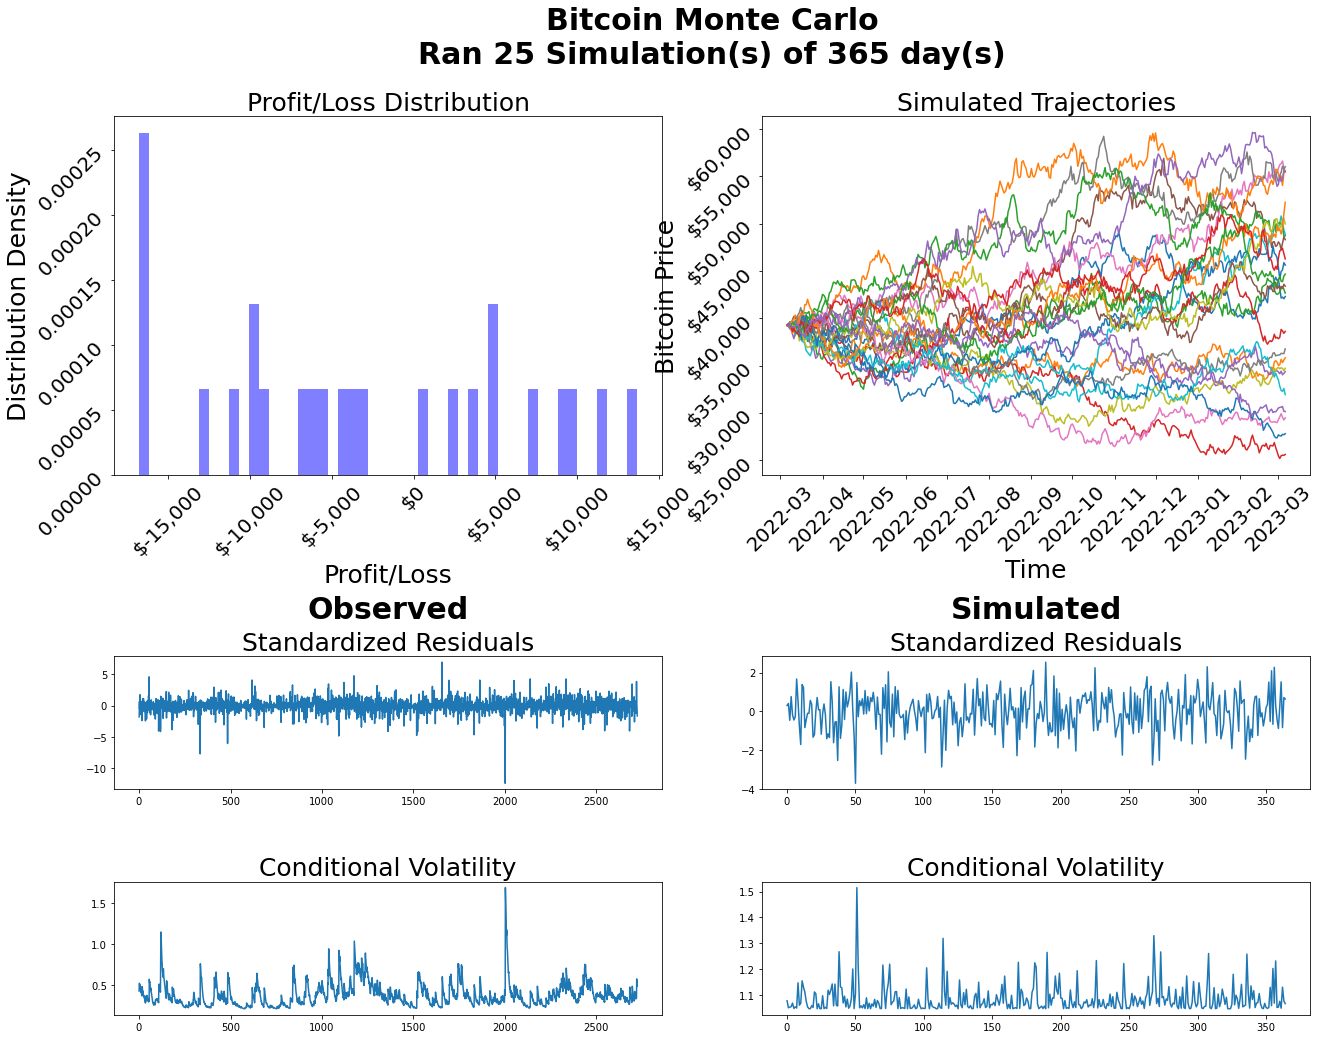

In [4]:
arch_garch = dict(vol='GARCH', p=1, q=1, o=0, mean="Constant", rescale=True, dist='normal') # These are default values, can be changed
TS = Timeseries_MonteCarlo(ticker=ticker, period=period, model=model, horizon=horizon, trading_days=trading_days, options_info=options_info, risk_free_rate=risk_free_rate, arima=arima,arch_garch=arch_garch)
TS.run_simulation(simulations)
TS.simulation_statistics()
# sigma^2_t = .0014 + .108 * return_(t-1)^2 + .892 * sigma^2_(t-1)


Beginning Simulations...
Completed Simulation # 1
Completed Simulation # 2
Completed Simulation # 3
Completed Simulation # 4
Completed Simulation # 5
Completed Simulation # 6
Completed Simulation # 7
Completed Simulation # 8
Completed Simulation # 9
Completed Simulation # 10
Completed Simulation # 11
Completed Simulation # 12
Completed Simulation # 13
Completed Simulation # 14
Completed Simulation # 15
Completed Simulation # 16
Completed Simulation # 17
Completed Simulation # 18
Completed Simulation # 19
Completed Simulation # 20
Completed Simulation # 21
Completed Simulation # 22
Completed Simulation # 23
Completed Simulation # 24
Completed Simulation # 25

25 Simulation(s) Completed in 0 hour(s), 0 minute(s), and 14.16 second(s)
--------------------------------------------------------------------------
Simulated prices from 7 year(s), 5 month(s), and 22 day(s) of historical data
Average Profit/Loss: $-1,039.85
Profit/Loss Ranges from $-10,752.99 - $6,160.66
Probability of Earning a R

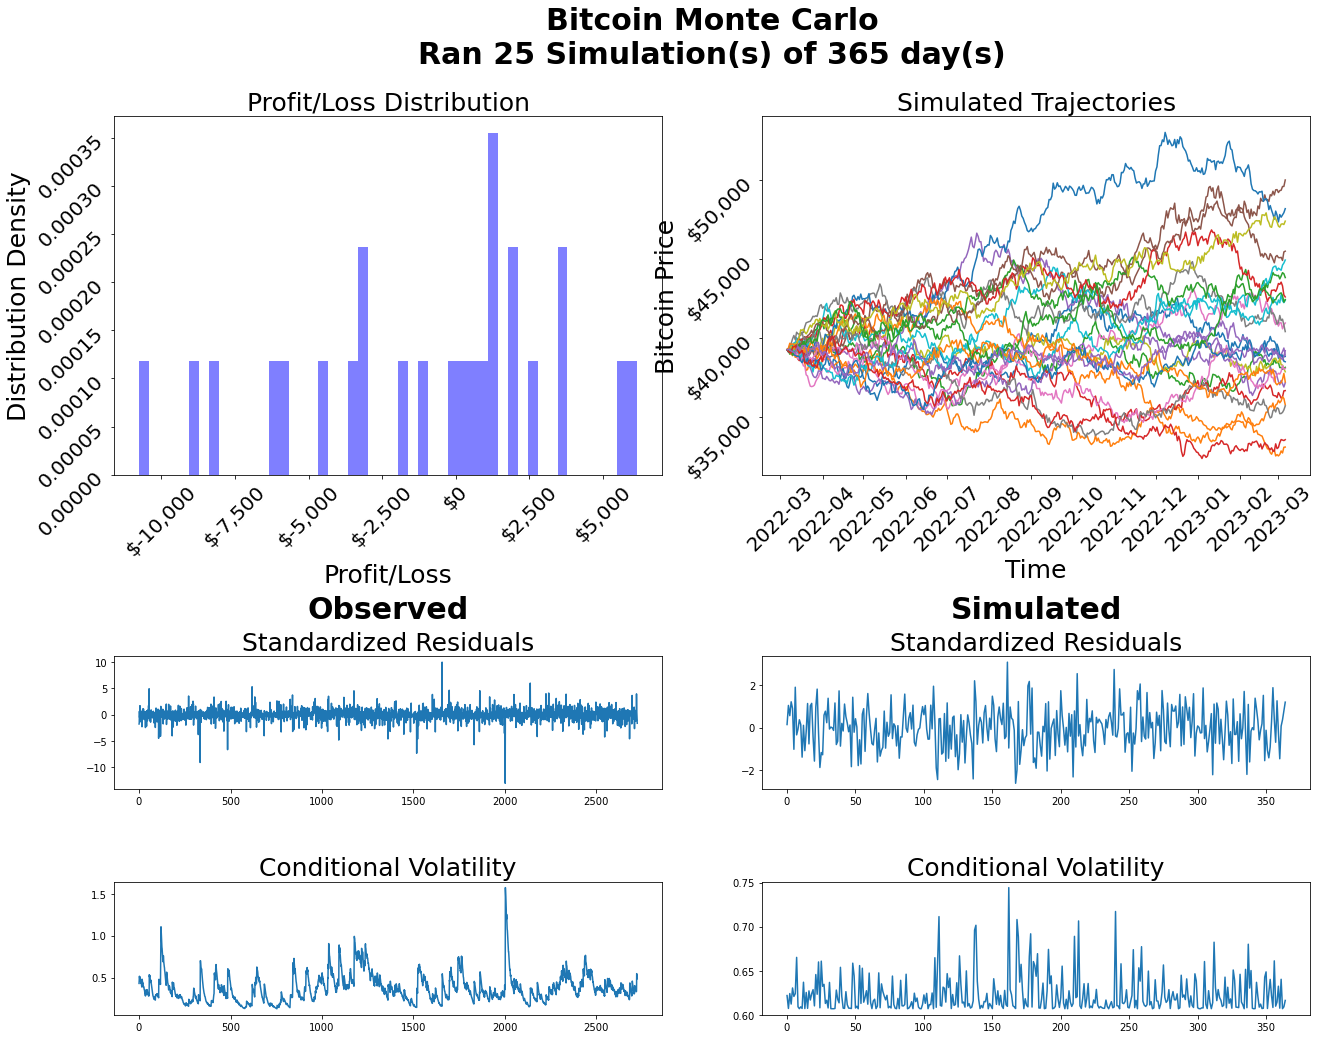

In [5]:
arch_garch = dict(vol='GARCH', p=1, q=1,o=0, mean="Constant", rescale=True, dist='t') # These are default values, can be changed
TS = Timeseries_MonteCarlo(ticker=ticker, period=period, model=model, horizon=horizon, trading_days=trading_days, options_info=options_info, risk_free_rate=risk_free_rate, arima=arima,arch_garch=arch_garch)
TS.run_simulation(simulations)
TS.simulation_statistics()

Beginning Simulations...
Completed Simulation # 1
Completed Simulation # 2
Completed Simulation # 3
Completed Simulation # 4
Completed Simulation # 5
Completed Simulation # 6
Completed Simulation # 7
Completed Simulation # 8
Completed Simulation # 9
Completed Simulation # 10
Completed Simulation # 11
Completed Simulation # 12
Completed Simulation # 13
Completed Simulation # 14
Completed Simulation # 15
Completed Simulation # 16
Completed Simulation # 17
Completed Simulation # 18
Completed Simulation # 19
Completed Simulation # 20
Completed Simulation # 21
Completed Simulation # 22
Completed Simulation # 23
Completed Simulation # 24
Completed Simulation # 25

25 Simulation(s) Completed in 0 hour(s), 0 minute(s), and 14.36 second(s)
--------------------------------------------------------------------------
Simulated prices from 7 year(s), 5 month(s), and 22 day(s) of historical data
Average Profit/Loss: $-664.29
Profit/Loss Ranges from $-8,379.78 - $8,077.15
Probability of Earning a Retu

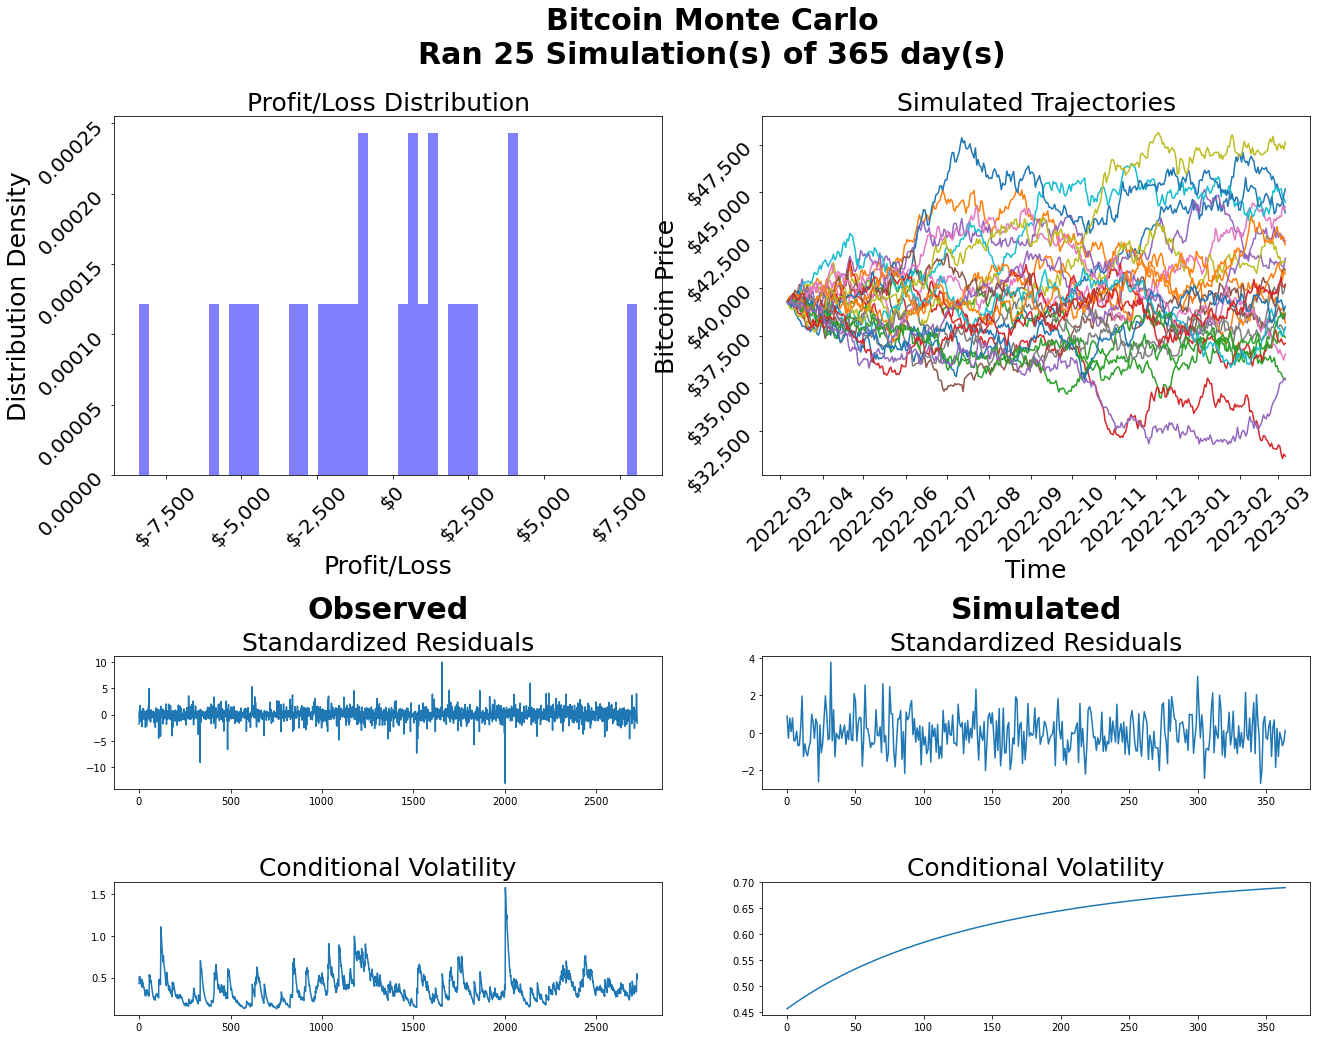

In [6]:
# This shows some real promise
arch_garch = dict(vol='GARCH', p=1, q=1,o=0, mean="Constant", rescale=True, dist='skewt') # These are default values, can be changed
TS = Timeseries_MonteCarlo(ticker=ticker, period=period, model=model, horizon=horizon, trading_days=trading_days, options_info=options_info, risk_free_rate=risk_free_rate, arima=arima,arch_garch=arch_garch)
TS.run_simulation(simulations)
TS.simulation_statistics()